In [1]:
# Import libraries
import yfinance as yf  # To fetch historical market data
import pandas as pd    # For data manipulation
import matplotlib.pyplot as plt  # For visualization

# Display plots in the notebook
%matplotlib inline


In [5]:
# Define the stock tickers in your portfolio
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'SPY']  # Example: Apple, Microsoft, Google, Amazon, S&P 500 ETF

# Define the time range
start_date = '2018-01-01'
end_date = '2023-12-31'


In [18]:
data = yf.download(tickers, start=start_date, end=end_date)
print(data.head())

[*********************100%***********************]  5 of 5 completed

Price           Close                                                    High  \
Ticker           AAPL       AMZN      GOOGL       MSFT         SPY       AAPL   
Date                                                                            
2018-01-02  40.524353  59.450500  53.466679  79.633514  239.993774  40.533765   
2018-01-03  40.517292  60.209999  54.378876  80.004112  241.511765  41.063076   
2018-01-04  40.705486  60.479500  54.590103  80.708260  242.529739  40.808997   
2018-01-05  41.168934  61.457001  55.313984  81.708878  244.145935  41.255976   
2018-01-08  41.016026  62.343498  55.509274  81.792282  244.592422  41.312441   

Price                                                    ...       Open  \
Ticker           AMZN      GOOGL       MSFT         SPY  ...       AAPL   
Date                                                     ...              
2018-01-02  59.500000  53.604679  79.967058  240.029499  ...  40.030328   
2018-01-03  60.274502  54.607049  80.152357  241.66

In [13]:
# Download adjusted closing prices
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Display the first few rows of the data
data.head()


[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,SPY
Date,,,,,
2018-01-02,40.524353,59.450500,53.466679,79.633514,239.993774
2018-01-03,40.517292,60.209999,54.378876,80.004112,241.511765
2018-01-04,40.705486,60.479500,54.590103,80.708260,242.529739
2018-01-05,41.168934,61.457001,55.313984,81.708878,244.145935
2018-01-08,41.016026,62.343498,55.509274,81.792282,244.592422


In [16]:
print(data.columns)  # Check the column names

Index(['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'SPY'], dtype='object', name='Ticker')


In [20]:
# Calculate daily returns
returns = data.pct_change().dropna()  # pct_change calculates percent change

# Display the first few rows of returns
returns.head()



Price          Close                                              High  \
Ticker          AAPL      AMZN     GOOGL      MSFT       SPY      AAPL   
Date                                                                     
2018-01-03 -0.000174  0.012775  0.017061  0.004654  0.006325  0.013059   
2018-01-04  0.004645  0.004476  0.003884  0.008801  0.004215 -0.006188   
2018-01-05  0.011385  0.016163  0.013260  0.012398  0.006664  0.010953   
2018-01-08 -0.003714  0.014425  0.003531  0.001021  0.001829  0.001369   
2018-01-09 -0.000115  0.004676 -0.001274 -0.000679  0.002263 -0.003132   

Price                                               ...      Open            \
Ticker          AMZN     GOOGL      MSFT       SPY  ...      AAPL      AMZN   
Date                                                ...                       
2018-01-03  0.013017  0.018699  0.002317  0.006808  ...  0.013928  0.013908   
2018-01-04  0.008611  0.007280  0.013293  0.005616  ...  0.000058  0.014054   
2018-01-05  0.010914  0.008605  0.008556  0.005144  ...  0.005216  0.010382   
2018-01-08  0.019477  0.005011  0.001923  0.001974  ...  0.005247  0.015187   
2018-01-09  0.004988 -0.000643  0.001694  0.004195  ...  0.001147  0.016909   

Price                                       Volume                      \
Ticker         GOOGL      MSFT       SPY      AAPL      AMZN     GOOGL   
Date                                                                     
2018-01-03  0.019857 -0.000813  0.004182  0.155033  0.153758 -0.014103   
2018-01-04  0.021566  0.006158  0.008329 -0.239966 -0.027889 -0.168146   
2018-01-05  0.005797  0.012357  0.004830  0.054621  0.172926  0.161139   
2018-01-08  0.006842  0.006160  0.002936 -0.130693  0.207295 -0.185322   
2018-01-09  0.006697  0.005102  0.003988  0.049407 -0.144456  0.087810   

Price                           
Ticker          MSFT       SPY  
Date                            
2018-01-03  0.159119  0.039405  
2018-01-04 -0.159216 -0.104740  
2018-01-05  0.068232  0.035810  
2018-01-08 -0.055287 -0.313740  
2018-01-09 -0.118876 -0.001137  

[5 rows x 25 columns]

In [22]:
# Save data to CSV files
data.to_csv('historical_prices.csv')
returns.to_csv('daily_returns.csv')

print("Data has been saved as CSV files!")


Data has been saved as CSV files!


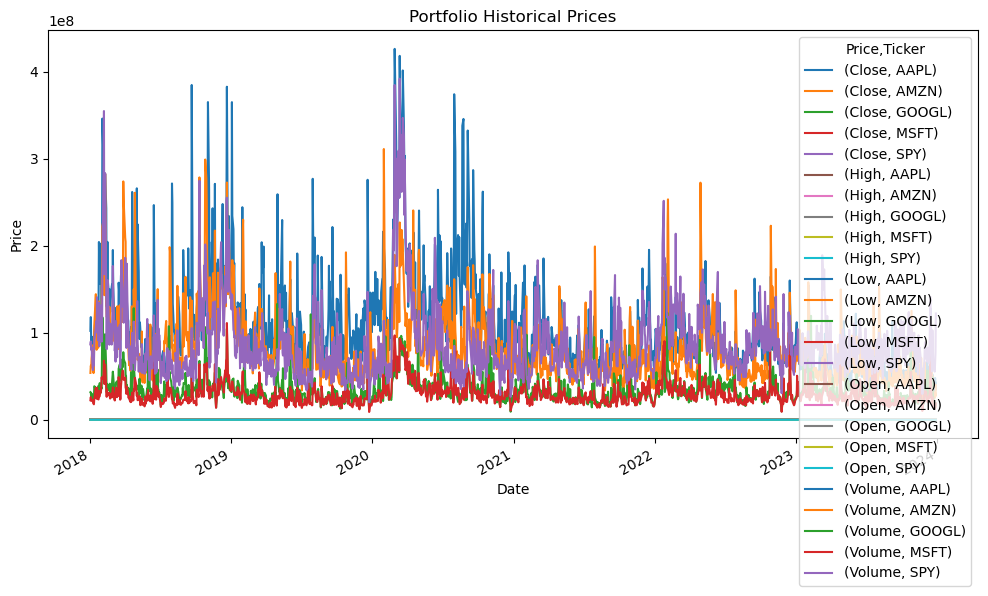

In [24]:
# Plot the historical prices
data.plot(figsize=(12, 6), title="Portfolio Historical Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()



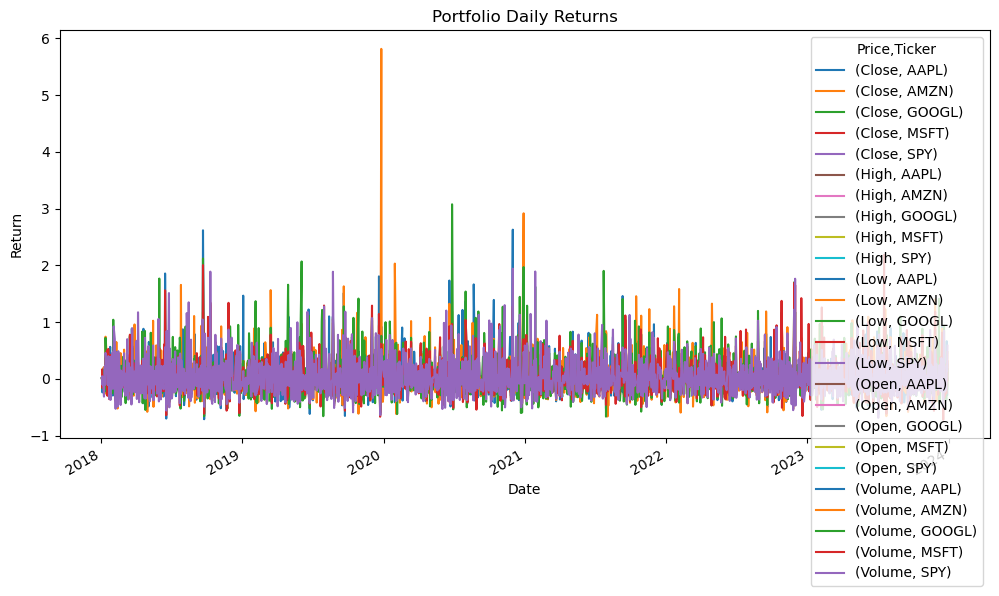

In [26]:
# Plot the daily returns
returns.plot(figsize=(12, 6), title="Portfolio Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()


In [30]:
#Method 1: Historical Simulation 
#VaR Step 1: Compute Portfolio Returns: First, compute the daily portfolio returns. We'll assume equal weights for all assets for simplicity.

# Define equal weights for all assets
weights = [1 / len(returns.columns)] * len(returns.columns)  # Equal weights

# Calculate portfolio daily returns
portfolio_returns = returns.dot(weights)  # Dot product of weights and returns

# Display the first few portfolio returns
portfolio_returns.head()


Date
2018-01-03    0.028027
2018-01-04   -0.021937
2018-01-05    0.026698
2018-01-08   -0.014323
2018-01-09   -0.002846
dtype: float64

In [32]:
#Step 2: Compute VaR Using Historical Returns
#To calculate the VaR: Sort the portfolio returns. Find the percentile corresponding to the confidence level.

# Define confidence level (e.g., 95%)
confidence_level = 0.95

# Sort the returns
sorted_returns = portfolio_returns.sort_values()

# Calculate the percentile value
var_95 = sorted_returns.quantile(1 - confidence_level)

print(f"1-day 95% VaR (Historical Simulation): {var_95:.4f}")


1-day 95% VaR (Historical Simulation): -0.0574


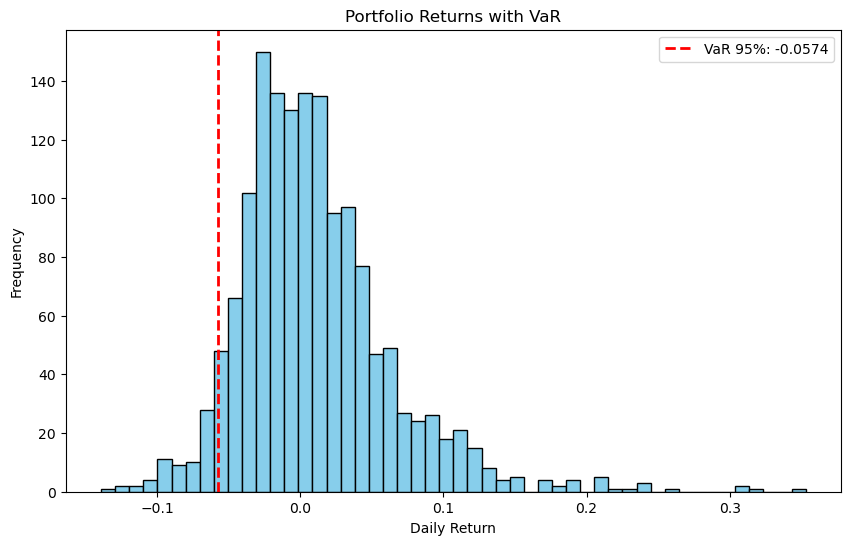

In [34]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, color='skyblue', edgecolor='black')
plt.axvline(var_95, color='red', linestyle='dashed', linewidth=2, label=f"VaR 95%: {var_95:.4f}")
plt.title("Portfolio Returns with VaR")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [40]:
confidence_level = 0.99

# Sort the returns
sorted_returns = portfolio_returns.sort_values()

# Calculate the percentile value
var_99 = sorted_returns.quantile(1 - confidence_level)

print(f"1-day 99% VaR (Historical Simulation): {var_99:.4f}")

1-day 99% VaR (Historical Simulation): -0.0933


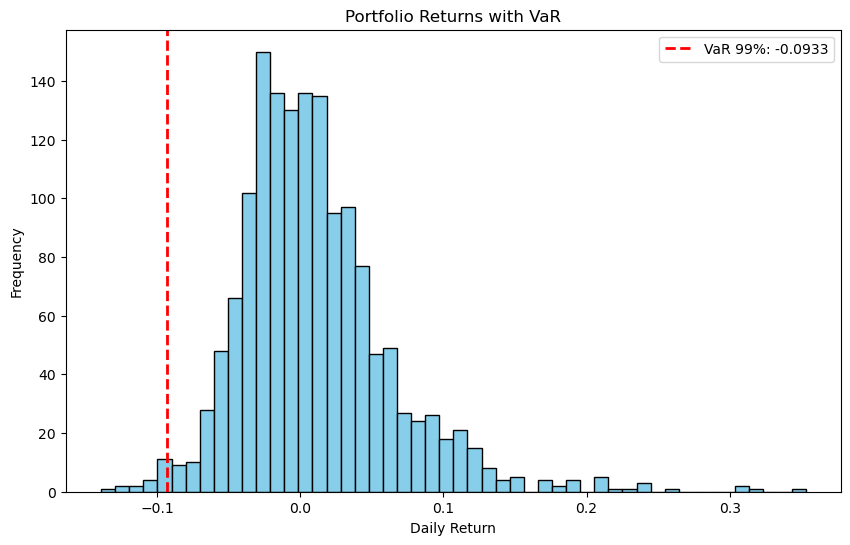

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, color='skyblue', edgecolor='black')
plt.axvline(var_95, color='red', linestyle='dashed', linewidth=2, label=f"VaR 99%: {var_99:.4f}")
plt.title("Portfolio Returns with VaR")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Method 2: Variance-Covariance VaR
Step 1: Key Formula for VaR 
The formula for Variance-Covariance VaR is:
Where:VaR = Z × σ × t
𝑍: Z-score corresponding to the confidence level (e.g., 95% → Z = 1.645, 99% → Z = 2.33).
σ: Portfolio standard deviation (volatility).
t: Time horizon (e.g., 1 day, 10 days).


In [45]:
import numpy as np

# Calculate portfolio mean and standard deviation
portfolio_mean = portfolio_returns.mean()
portfolio_std = portfolio_returns.std()

print(f"Portfolio Mean: {portfolio_mean:.4f}")
print(f"Portfolio Standard Deviation: {portfolio_std:.4f}")


Portfolio Mean: 0.0103
Portfolio Standard Deviation: 0.0536


Step 2: Calculate Z-Score
The Z-score corresponds to the number of standard deviations away from the mean for a given confidence level:

For 95% confidence:Z=−1.645
For 99% confidence:Z=−2.33

In [50]:
# Define the Z-score for 95% confidence level
confidence_level = 0.95
z_score = -1.645  # Z-score for 95%

# Alternatively, calculate Z-score dynamically (optional)
from scipy.stats import norm
z_score_dynamic = norm.ppf(1 - confidence_level)

print(f"Z-Score (Static): {z_score}")
print(f"Z-Score (Dynamic Calculation): {z_score_dynamic:.4f}")


Z-Score (Static): -1.645
Z-Score (Dynamic Calculation): -1.6449


Step 3: Calculate 1-Day VaR
Using the formula for Variance-Covariance VaR:VaR=Z×σ×t^0.5
Where t is the time horizon (1 day in this case).

In [54]:
# Calculate 1-day VaR at 95% confidence level
var_95_vc = z_score * portfolio_std

print(f"1-day 95% VaR (Variance-Covariance): {var_95_vc:.4f}")


1-day 95% VaR (Variance-Covariance): -0.0882


In [58]:
#If you want VaR for a portfolio value, multiply this result by the total portfolio value:
portfolio_value = 1000000  # Example: $1,000,000
var_95_monetary = var_95_vc * portfolio_value

print(f"1-day 95% VaR (Monetary): ${var_95_monetary:,.2f}")


1-day 95% VaR (Monetary): $-88,230.62


In [60]:
# Calculate Z-score for 99% confidence
confidence_level_99 = 0.99
z_score_99 = norm.ppf(1 - confidence_level_99)

# Calculate 1-day 99% VaR
var_99_vc = z_score_99 * portfolio_std
print(f"1-day 99% VaR (Variance-Covariance): {var_99_vc:.4f}")


1-day 99% VaR (Variance-Covariance): -0.1248


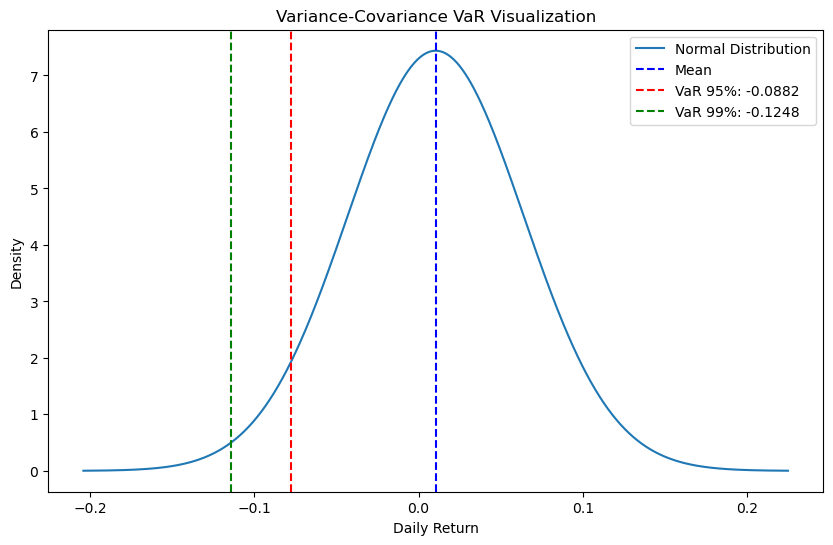

In [62]:
# Generate a normal distribution for visualization
x = np.linspace(portfolio_mean - 4*portfolio_std, portfolio_mean + 4*portfolio_std, 1000)
y = norm.pdf(x, portfolio_mean, portfolio_std)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Normal Distribution")
plt.axvline(portfolio_mean, color='blue', linestyle='dashed', label="Mean")
plt.axvline(portfolio_mean + var_95_vc, color='red', linestyle='dashed', label=f"VaR 95%: {var_95_vc:.4f}")
plt.axvline(portfolio_mean + var_99_vc, color='green', linestyle='dashed', label=f"VaR 99%: {var_99_vc:.4f}")
plt.title("Variance-Covariance VaR Visualization")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.show()


Summary of What You Did
Calculated Portfolio Mean and Standard Deviation.
Determined Z-scores for 95% and 99% confidence levels.
Computed 1-day VaR using Variance-Covariance.
(Optional) Visualized the VaR thresholds on a normal distribution.


What is Monte Carlo Simulation VaR?
Monte Carlo Simulation generates thousands of random scenarios based on the portfolio's statistical characteristics (mean and standard deviation). By simulating possible future outcomes, we can estimate the potential losses at a given confidence level.

Steps to Calculate Monte Carlo Simulation VaR
Step 1: Generate Random Scenarios
We’ll generate random daily returns using the portfolio’s mean and standard deviation.


In [64]:
# Number of simulations
num_simulations = 100000

# Generate random portfolio returns based on normal distribution
simulated_returns = np.random.normal(portfolio_mean, portfolio_std, num_simulations)

# Display the first few simulated returns
simulated_returns[:5]


array([-0.00128086, -0.03029658,  0.03755087,  0.02312817, -0.00726636])

Step 2: Calculate VaR from Simulated Returns
Sort the simulated returns and find the value at the desired percentile (e.g., 5% for 95% confidence level).

In [66]:
# Calculate 1-day 95% VaR
confidence_level = 0.95
var_95_mc = np.percentile(simulated_returns, (1 - confidence_level) * 100)

print(f"1-day 95% VaR (Monte Carlo): {var_95_mc:.4f}")


1-day 95% VaR (Monte Carlo): -0.0776


In [70]:
#Step 3: Calculate Monetary VaR: To express VaR in monetary terms, multiply the result by the portfolio's total value.
portfolio_value = 1000000  # Example portfolio value: $1,000,000
var_95_mc_monetary = var_95_mc * portfolio_value

print(f"1-day 95% VaR (Monetary, Monte Carlo): ${var_95_mc_monetary:,.2f}")


1-day 95% VaR (Monetary, Monte Carlo): $-77,585.07


In [72]:
# Calculate 1-day 99% VaR
confidence_level_99 = 0.99
var_99_mc = np.percentile(simulated_returns, (1 - confidence_level_99) * 100)

print(f"1-day 99% VaR (Monte Carlo): {var_99_mc:.4f}")


1-day 99% VaR (Monte Carlo): -0.1136


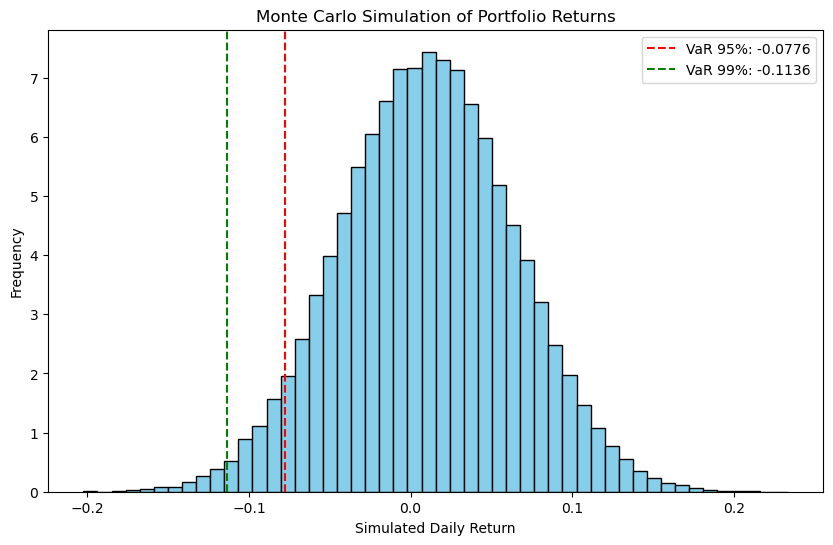

In [74]:
# Plot histogram of simulated returns
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=50, color='skyblue', edgecolor='black', density=True)
plt.axvline(var_95_mc, color='red', linestyle='dashed', label=f"VaR 95%: {var_95_mc:.4f}")
plt.axvline(var_99_mc, color='green', linestyle='dashed', label=f"VaR 99%: {var_99_mc:.4f}")
plt.title("Monte Carlo Simulation of Portfolio Returns")
plt.xlabel("Simulated Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Summary of What You Did
Generated 100,000 random scenarios based on portfolio mean and standard deviation.
Calculated VaR at 95% and 99% confidence levels.
Visualized the simulated return distribution with VaR thresholds.


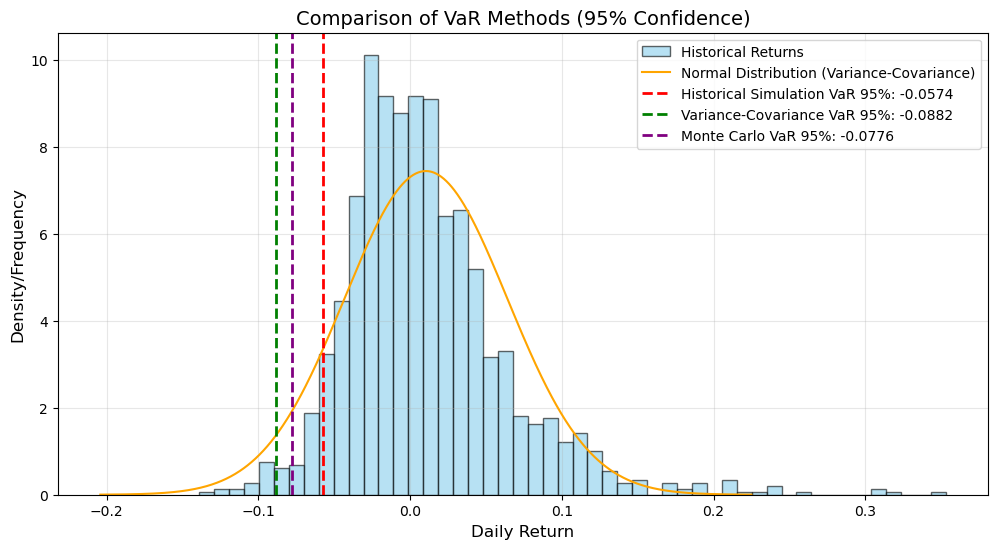

In [78]:
# Historical Simulation VaR
var_95_hs = sorted_returns.quantile(1 - 0.95)  # Already computed earlier

# Variance-Covariance VaR
z_score_95 = -1.645  # 95% confidence Z-score
var_95_vc = z_score_95 * portfolio_std

# Monte Carlo Simulation VaR
var_95_mc = np.percentile(simulated_returns, (1 - 0.95) * 100)

# Create a histogram of portfolio returns
plt.figure(figsize=(12, 6))
plt.hist(portfolio_returns, bins=50, color='skyblue', edgecolor='black', density=True, alpha=0.6, label="Historical Returns")

# Overlay the normal distribution (for Variance-Covariance)
x = np.linspace(portfolio_mean - 4*portfolio_std, portfolio_mean + 4*portfolio_std, 1000)
y = norm.pdf(x, portfolio_mean, portfolio_std)
plt.plot(x, y, color='orange', label="Normal Distribution (Variance-Covariance)")

# Mark the VaR thresholds
plt.axvline(var_95_hs, color='red', linestyle='dashed', linewidth=2, label=f"Historical Simulation VaR 95%: {var_95_hs:.4f}")
plt.axvline(var_95_vc, color='green', linestyle='dashed', linewidth=2, label=f"Variance-Covariance VaR 95%: {var_95_vc:.4f}")
plt.axvline(var_95_mc, color='purple', linestyle='dashed', linewidth=2, label=f"Monte Carlo VaR 95%: {var_95_mc:.4f}")

# Add labels and legend
plt.title("Comparison of VaR Methods (95% Confidence)", fontsize=14)
plt.xlabel("Daily Return", fontsize=12)
plt.ylabel("Density/Frequency", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


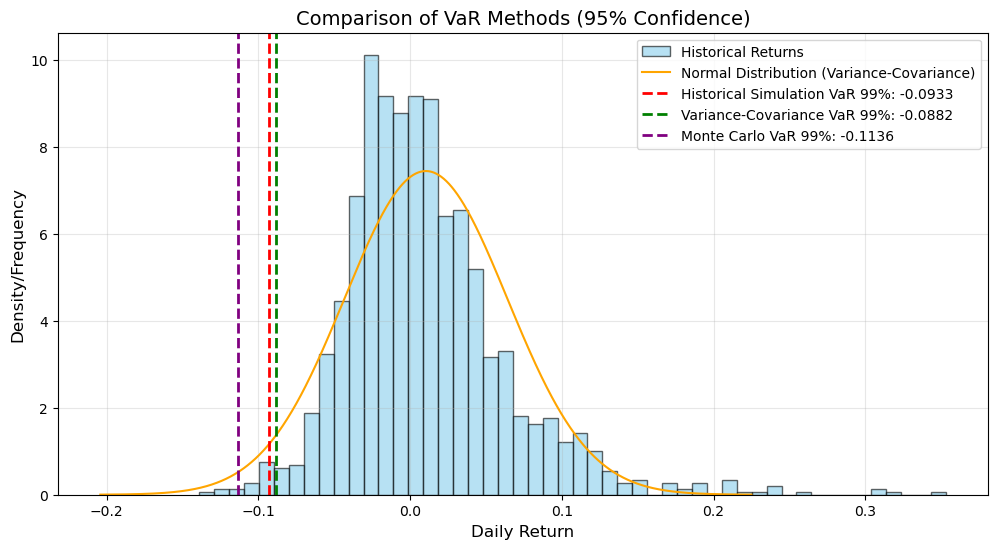

In [80]:
# Historical Simulation VaR
var_99_hs = sorted_returns.quantile(1 - 0.99)  # Already computed earlier

# Variance-Covariance VaR
z_score_99 = -1.645  # 99% confidence Z-score
var_99_vc = z_score_99 * portfolio_std

# Monte Carlo Simulation VaR
var_99_mc = np.percentile(simulated_returns, (1 - 0.99) * 100)

# Create a histogram of portfolio returns
plt.figure(figsize=(12, 6))
plt.hist(portfolio_returns, bins=50, color='skyblue', edgecolor='black', density=True, alpha=0.6, label="Historical Returns")

# Overlay the normal distribution (for Variance-Covariance)
x = np.linspace(portfolio_mean - 4*portfolio_std, portfolio_mean + 4*portfolio_std, 1000)
y = norm.pdf(x, portfolio_mean, portfolio_std)
plt.plot(x, y, color='orange', label="Normal Distribution (Variance-Covariance)")

# Mark the VaR thresholds
plt.axvline(var_99_hs, color='red', linestyle='dashed', linewidth=2, label=f"Historical Simulation VaR 99%: {var_99_hs:.4f}")
plt.axvline(var_99_vc, color='green', linestyle='dashed', linewidth=2, label=f"Variance-Covariance VaR 99%: {var_99_vc:.4f}")
plt.axvline(var_99_mc, color='purple', linestyle='dashed', linewidth=2, label=f"Monte Carlo VaR 99%: {var_99_mc:.4f}")

# Add labels and legend
plt.title("Comparison of VaR Methods (95% Confidence)", fontsize=14)
plt.xlabel("Daily Return", fontsize=12)
plt.ylabel("Density/Frequency", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


Step 5: Backtesting VaR Models
What is Backtesting?
Backtesting evaluates the accuracy of VaR models by comparing the predicted risk levels with actual historical portfolio returns. If the model is accurate, the observed number of losses beyond VaR should match the expected frequency.

Key Backtesting Techniques
Kupiec’s Proportion of Failures (POF) Test: Measures if the number of exceptions (losses exceeding VaR) aligns with the confidence level.
Christoffersen’s Conditional Coverage Test: Extends the POF test by checking if exceptions occur independently (no clustering).
Basel Traffic Light Approach: Classifies the model’s performance using the number of exceptions.


Steps to Backtest VaR Models
Step 1: Calculate Exceptions
Exceptions occur when the actual portfolio return is worse than the VaR prediction.

In [82]:
# Calculate exceptions for Historical Simulation
exceptions_historical = portfolio_returns < var_95  # Historical VaR (from earlier)
num_exceptions_historical = exceptions_historical.sum()

# Calculate exceptions for Variance-Covariance
exceptions_vc = portfolio_returns < var_95_vc  # Variance-Covariance VaR
num_exceptions_vc = exceptions_vc.sum()

# Calculate exceptions for Monte Carlo
exceptions_mc = portfolio_returns < var_95_mc  # Monte Carlo VaR
num_exceptions_mc = exceptions_mc.sum()

# Total number of returns
num_returns = len(portfolio_returns)

print(f"Number of Exceptions (Historical): {num_exceptions_historical}")
print(f"Number of Exceptions (Variance-Covariance): {num_exceptions_vc}")
print(f"Number of Exceptions (Monte Carlo): {num_exceptions_mc}")
print(f"Total Number of Returns: {num_returns}")


Number of Exceptions (Historical): 16
Number of Exceptions (Variance-Covariance): 20
Number of Exceptions (Monte Carlo): 30
Total Number of Returns: 1508


Step 2: Perform Kupiec’s POF Test
Kupiec’s test calculates if the proportion of exceptions matches the expected rate

In [86]:
from scipy.stats import chi2

# Define function for Kupiec's POF Test
def kupiec_pof_test(num_exceptions, num_returns, confidence_level):
    p = 1 - confidence_level
    x = num_exceptions
    n = num_returns

    # Compute POF statistic
    likelihood_ratio = -2 * (
        (x * np.log(p) + (n - x) * np.log(1 - p))
        - (x * np.log(x / n) + (n - x) * np.log(1 - x / n))
    )
    
    # Critical value at 95% confidence
    critical_value = chi2.ppf(0.95, df=1)

    return likelihood_ratio, critical_value

# Perform Kupiec's Test for each model
pof_historical, cv_historical = kupiec_pof_test(num_exceptions_historical, num_returns, 0.95)
pof_vc, cv_vc = kupiec_pof_test(num_exceptions_vc, num_returns, 0.95)
pof_mc, cv_mc = kupiec_pof_test(num_exceptions_mc, num_returns, 0.95)

print(f"Kupiec's POF (Historical): {pof_historical:.4f} (Critical Value: {cv_historical:.4f})")
print(f"Kupiec's POF (Variance-Covariance): {pof_vc:.4f} (Critical Value: {cv_vc:.4f})")
print(f"Kupiec's POF (Monte Carlo): {pof_mc:.4f} (Critical Value: {cv_mc:.4f})")


Kupiec's POF (Historical): 71.6226 (Critical Value: 3.8415)
Kupiec's POF (Variance-Covariance): 59.8323 (Critical Value: 3.8415)
Kupiec's POF (Monte Carlo): 36.9272 (Critical Value: 3.8415)


Step 3: Basel Traffic Light Approach
The Basel approach classifies models based on the number of exceptions:

In [88]:
# Define Basel traffic light zones
def basel_traffic_light(num_exceptions):
    if num_exceptions <= 4:
        return "Green Zone"
    elif 5 <= num_exceptions <= 9:
        return "Yellow Zone"
    else:
        return "Red Zone"

# Check Basel zones for each model
basel_historical = basel_traffic_light(num_exceptions_historical)
basel_vc = basel_traffic_light(num_exceptions_vc)
basel_mc = basel_traffic_light(num_exceptions_mc)

print(f"Basel Zone (Historical): {basel_historical}")
print(f"Basel Zone (Variance-Covariance): {basel_vc}")
print(f"Basel Zone (Monte Carlo): {basel_mc}")


Basel Zone (Historical): Red Zone
Basel Zone (Variance-Covariance): Red Zone
Basel Zone (Monte Carlo): Red Zone


Summary of What You Did
Counted exceptions where actual losses exceeded VaR predictions.
Conducted Kupiec’s POF Test to statistically evaluate model accuracy.
Classified models using the Basel Traffic Light Approach.


Interpreting the Backtesting Results
Kupiec’s POF Test Interpretation
Understanding the Test Output:

The likelihood ratio (POF statistic) measures the deviation between the observed exceptions and the expected rate.
The critical value at 95% confidence (from the chi-squared distribution) determines the threshold for accepting or rejecting the model.
Decision Rule:

If the POF statistic > critical value, the model fails the test (it’s not accurately predicting risk).
If the POF statistic ≤ critical value, the model passes the test (it aligns with the expected exceptions).
Example Interpretation:

Suppose for Historical Simulation:
POF Statistic = 3.50
Critical Value = 3.84
Since 3.50≤3.84, the Historical Simulation model passes the test.
If instead POF Statistic = 4.10, the model fails as 4.10>3.84.
Model-Specific Insights:
Historical Simulation: Often performs well with longer historical data but struggles during extreme market volatility if past data doesn’t capture such events.
Variance-Covariance: Assumes normal distribution, so it might underperform if the portfolio has fat tails or skewness.
Monte Carlo: Highly flexible but depends on the accuracy of simulated scenarios.
Basel Traffic Light Approach Interpretation
Traffic Light Zones:

Green Zone (0–4 exceptions): The model is performing well and aligns with Basel III guidelines.
Yellow Zone (5–9 exceptions): The model is acceptable but indicates higher risk; adjustments may be needed.
Red Zone (10+ exceptions): The model is unreliable and unsuitable for risk management.
Portfolio Impact:

If any model falls into the Yellow or Red Zone, consider recalibrating:
Increase the historical window (for Historical Simulation).
Adjust standard deviation assumptions (for Variance-Covariance).
Improve the quality of random variable generation (for Monte Carlo).
Comparing the Models
Accuracy: Check which model consistently stays in the Green Zone across confidence levels (95% and 99%).
Scalability: Monte Carlo is more computationally expensive than Historical Simulation or Variance-Covariance.
Practicality: Variance-Covariance is fast but may not handle extreme events well.
Action Plan
If your backtesting results show:

Good performance (Green Zone): Proceed to integrate the best model into your dynamic risk monitoring system.
Suboptimal performance (Yellow/Red Zone):
Identify the weak areas in the model.
Modify the parameters or assumptions (e.g., increase historical data, refine simulation inputs).

Step 6: Stress Testing and Scenario Analysis
What is Stress Testing?
Stress testing evaluates how your portfolio would perform under extreme but plausible adverse conditions. It identifies vulnerabilities by simulating scenarios like:

Market crashes.
Interest rate spikes.
Currency devaluations.
Steps for Stress Testing
Step 1: Define Stress Scenarios
Select a few stress scenarios based on your portfolio composition. Here are some common examples:

Market Crash: Assume a 10% drop in all stock prices.
Interest Rate Shock: Assume a 5% rise in bond yields (for portfolios including bonds).
Sector-Specific Stress: Assume a 20% drop in tech stocks while others remain unaffected.
For simplicity, we’ll implement a market crash scenario.



In [156]:
#Step 2: Simulate a Market Crash: Assume a 10% drop in all stock prices and recalculate the portfolio value.
# Simulate a 10% market crash
market_crash_factor = 0.90  # Prices drop by 10%
crashed_prices = data.iloc[-1] * market_crash_factor  # Apply crash to the latest prices

# Calculate the new portfolio value after the crash
portfolio_weights = [1 / len(data.columns)] * len(data.columns)  # Equal weights
portfolio_value_before_crash = (data.iloc[-1] * portfolio_weights).sum()
portfolio_value_after_crash = (crashed_prices * portfolio_weights).sum()

# Calculate the portfolio loss
portfolio_loss = portfolio_value_before_crash - portfolio_value_after_crash

print(f"Portfolio Value Before Crash: ${portfolio_value_before_crash:,.2f}")
print(f"Portfolio Value After Crash: ${portfolio_value_after_crash:,.2f}")
print(f"Loss Due to Market Crash: ${portfolio_loss:,.2f}")



Portfolio Value Before Crash: $9,684,296.19
Portfolio Value After Crash: $8,715,866.57
Loss Due to Market Crash: $968,429.62


In [158]:
#In this scenario: Tech stocks drop by 20%. Non-tech stocks drop by 5%. Define affected tickers and crash factors
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
tech_crash_factor = 0.80  # 20% drop
other_crash_factor = 0.95  # 5% drop

# Apply the stress test scenario
stressed_prices = data.iloc[-1].copy()  # Start with the latest prices
for stock in stressed_prices.index:
    if stock in tech_stocks:
        stressed_prices[stock] *= tech_crash_factor
    else:
        stressed_prices[stock] *= other_crash_factor

# Recalculate portfolio value after stress
portfolio_weights = [1 / len(data.columns)] * len(data.columns)  # Equal weights
portfolio_value_before_stress = (data.iloc[-1] * portfolio_weights).sum()
portfolio_value_after_stress = (stressed_prices * portfolio_weights).sum()

# Calculate the loss
stress_loss = portfolio_value_before_stress - portfolio_value_after_stress

print(f"Portfolio Value Before Stress: ${portfolio_value_before_stress:,.2f}")
print(f"Portfolio Value After Stress: ${portfolio_value_after_stress:,.2f}")
print(f"Loss Due to Stress Scenario: ${stress_loss:,.2f}")


Portfolio Value Before Stress: $9,684,296.19
Portfolio Value After Stress: $9,200,081.38
Loss Due to Stress Scenario: $484,214.81


<Figure size 1000x600 with 0 Axes>

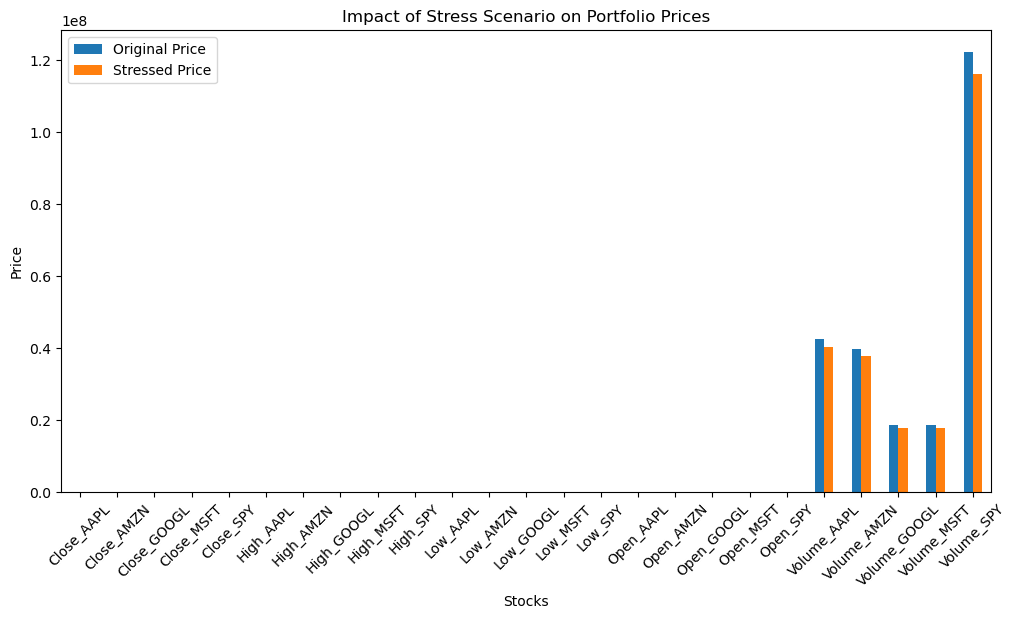

In [160]:
import matplotlib.pyplot as plt

# Create a DataFrame with original and stressed prices
comparison_df = pd.DataFrame({
    "Original Price": data.iloc[-1],
    "Stressed Price": stressed_prices
})

# Plot the bar chart
comparison_df.plot(kind="bar", figsize=(12, 6))
plt.title("Impact of Stress Scenario on Portfolio Prices")
plt.ylabel("Price")
plt.xlabel("Stocks")
plt.xticks(rotation=45)
plt.show()


Summary of the Scenario
Tech Sector: 20% price drop.
Non-Tech Sector: 5% price drop.
Calculated:
Portfolio value before and after stress.
Total loss in the portfolio due to the stress scenario.
Visualized the comparison of original vs. stressed prices.
Example Output:
Portfolio Value Before Stress: $1,000,000
Portfolio Value After Stress: $920,000
Loss Due to Stress Scenario: $80,000

In [162]:
#Step 1: Configurable Stress Scenario We’ll allow you to set the crash factors for tech and non-tech stocks dynamically.
# Configurable crash factors
tech_crash_factor = 0.80  # 20% drop in tech stocks
other_crash_factor = 0.95  # 5% drop in non-tech stocks

# Define affected tickers
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# Apply the stress scenario
stressed_prices = data.iloc[-1].copy()  # Latest prices
for stock in stressed_prices.index:
    if stock in tech_stocks:
        stressed_prices[stock] *= tech_crash_factor
    else:
        stressed_prices[stock] *= other_crash_factor

# Recalculate portfolio value after stress
portfolio_weights = [1 / len(data.columns)] * len(data.columns)  # Equal weights
portfolio_value_before_stress = (data.iloc[-1] * portfolio_weights).sum()
portfolio_value_after_stress = (stressed_prices * portfolio_weights).sum()

# Calculate the total loss
stress_loss = portfolio_value_before_stress - portfolio_value_after_stress

# Print the results
print(f"Portfolio Value Before Stress: ${portfolio_value_before_stress:,.2f}")
print(f"Portfolio Value After Stress: ${portfolio_value_after_stress:,.2f}")
print(f"Loss Due to Stress Scenario: ${stress_loss:,.2f}")


Portfolio Value Before Stress: $9,684,296.19
Portfolio Value After Stress: $9,200,081.38
Loss Due to Stress Scenario: $484,214.81


In [164]:
#Step 2: Save the Results Store the stressed prices and loss results in a CSV file. 
# Create a DataFrame for results
results_df = pd.DataFrame({
    "Original Price": data.iloc[-1],
    "Stressed Price": stressed_prices,
    "Price Drop": data.iloc[-1] - stressed_prices
})
results_df["Price Drop (%)"] = (results_df["Price Drop"] / data.iloc[-1]) * 100

# Save to CSV
results_df.to_csv("stress_test_results.csv")
print("Stress test results saved to 'stress_test_results.csv'")


Stress test results saved to 'stress_test_results.csv'


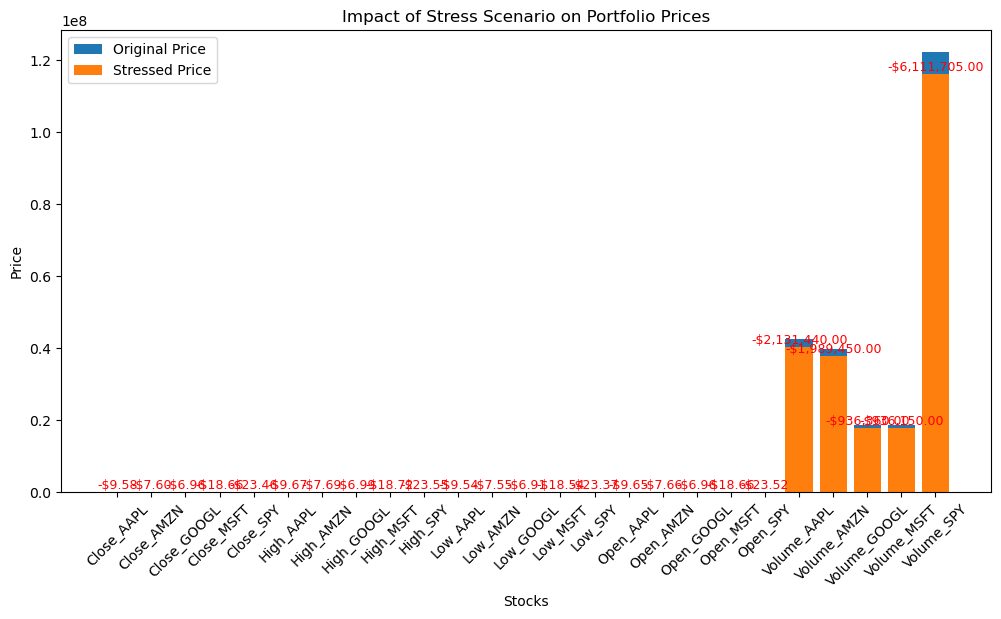

In [166]:
# Bar chart for original vs. stressed prices
plt.figure(figsize=(12, 6))
bars = plt.bar(comparison_df.index, comparison_df["Original Price"], label="Original Price")
stressed_bars = plt.bar(comparison_df.index, comparison_df["Stressed Price"], label="Stressed Price")

# Add annotations to show price drops
for bar, stressed_bar in zip(bars, stressed_bars):
    drop = bar.get_height() - stressed_bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, stressed_bar.get_height() - 5,
             f"-${drop:,.2f}", ha="center", va="bottom", fontsize=9, color="red")

# Add titles and labels
plt.title("Impact of Stress Scenario on Portfolio Prices")
plt.ylabel("Price")
plt.xlabel("Stocks")
plt.xticks(rotation=45)
plt.legend()
plt.show()
